# **Web Scraping Pagina TYC Sport**

## Scrapeo y descarga de Datos

In [144]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_equipos(url):

    response = requests.get(url)

    if response.status_code == 200:

        soup = BeautifulSoup(response.text, 'html.parser')
        equipos_data = []


        tabla_posiciones = soup.find('table', class_='stats-table', id='posiciones')

        filas = tabla_posiciones.find_all('tr')

        for fila in filas[2:]:

            columnas = fila.find_all('td')

            if len(columnas) >= 10:
                posicion = columnas[0].text.strip()
                nombre = columnas[1].text.strip()
                puntos = columnas[2].text.strip()
                partidos_jugados = columnas[3].text.strip()
                partidos_ganados = columnas[4].text.strip()
                partidos_empatados = columnas[5].text.strip()
                partidos_perdidos = columnas[6].text.strip()
                goles_a_favor = columnas[7].text.strip()
                goles_en_contra = columnas[8].text.strip()


                equipos_data.append({'Posición': posicion, 'Equipo': nombre, 'Puntos': puntos, 'PJ': partidos_jugados,
                                     'PG': partidos_ganados, 'PE': partidos_empatados, 'PP': partidos_perdidos,
                                     'GF': goles_a_favor, 'GC': goles_en_contra})


        df = pd.DataFrame(equipos_data)
        return df
    else:

        print("Error al obtener el contenido de la página")
        return None

url = "https://www.tycsports.com/estadisticas/liga-profesional-de-futbol/tabla-de-posiciones.html"



equipos_zona_a = equipos_df.iloc[:14].copy()
equipos_zona_b = equipos_df.iloc[14:28].copy()


equipos_zona_a['Zona'] = 'Zona A'
equipos_zona_b['Zona'] = 'Zona B'

print("Equipos Zona A:")
print(equipos_zona_a)

print("\nEquipos Zona B:")
print(equipos_zona_b)


Equipos Zona A:
   Posición            Equipo Puntos PJ PG PE PP  GF GC    Zona
0         1     Independiente     13  6  4  1  1   5  1  Zona A
1         2       River Plate     12  6  3  3  0  12  2  Zona A
2         3         Instituto     11  6  3  2  1   9  4  Zona A
3         4        Argentinos     11  6  3  2  1  10  6  Zona A
4         5  Barracas Central     11  6  3  2  1   6  4  Zona A
5         6          Talleres     10  6  3  1  2  11  8  Zona A
6         7            VÃ©lez     10  6  3  1  2   7  9  Zona A
7         8          Gimnasia      9  6  3  0  3   9  9  Zona A
8         9   Rosario Central      8  6  2  2  2   5  7  Zona A
9        10        Indep.Mza.      6  6  2  0  4   6  8  Zona A
10       11          HuracÃ¡n      4  6  1  1  4   4  8  Zona A
11       12      Dep. Riestra      4  6  1  1  4   2  8  Zona A
12       13          Banfield      3  6  0  3  3   3  9  Zona A
13       14     Atl. TucumÃ¡n      3  6  0  3  3   1  7  Zona A

Equipos Zona B:
   Posi

In [183]:

url = "https://www.tycsports.com/estadisticas/liga-profesional-de-futbol/tabla-de-goleadores.html"

response = requests.get(url)

datos_goleadores = []


if response.status_code == 200:

    soup = BeautifulSoup(response.content, 'html.parser')


    tabla_goleadores = soup.find('table', {'id': 'goleadores'})

    if tabla_goleadores:

        filas = tabla_goleadores.find_all('tr')[1:]


        for fila in filas:
            datos = fila.find_all('td')
            jugador = datos[0].text.strip()
            goles = datos[2].text.strip()
            datos_goleadores.append({'Jugador': jugador, 'Goles': goles})
    else:
        print("No se encontró la tabla de goleadores.")
else:
    print("La solicitud GET no fue exitosa.")

df_goleadores = pd.DataFrame(datos_goleadores)

print(df_goleadores)

                   Jugador Goles
0       Miguel Ángel Borja     6
1     Juan Ignacio Ramírez     5
2          Adrián Martínez     5
3            Damián Puebla     4
4             Adam Bareiro     3
5           Tomás Badaloni     3
6               Walter Bou     3
7             Mauro Méndez     3
8   Miguel Ángel Merentiel     3
9             Gastón Togni     3
10        Leonardo Heredia     3


## Correccion de Nombres de Equipos del Dataframe

In [145]:
nombres_corregidos = {
    'VÃ©lez': 'Vélez',
    'HuracÃ¡n': 'Huracán',
    'Atl. TucumÃ¡n': 'Atlético Tucumán',
    'LanÃºs': 'Lanús',
    'Newell`s': 'Newell\'s',
    'UniÃ³n': 'Unión',
    'San Lorenzo': 'San Lorenzo',
    'Platense': 'Platense',
    'C.CÃ³rdoba (SE)': 'Córdoba (SE)',
}

equipos_zona_b['Equipo'] = equipos_zona_b['Equipo'].replace(nombres_corregidos)
equipos_zona_b

,Posición,Equipo,Puntos,PJ,PG,PE,PP,GF,GC,Zona
14,1,Godoy Cruz,16,6,5,1,0,8,0,Zona B
15,2,Estudiantes,14,6,4,2,0,7,1,Zona B
16,3,Lanús,12,6,4,0,2,8,4,Zona B
17,4,Newell's,12,6,4,0,2,7,7,Zona B
18,5,Defensa,11,6,3,2,1,8,5,Zona B
19,6,Racing Club,10,6,3,1,2,11,4,Zona B
20,7,Boca Juniors,9,6,2,3,1,6,3,Zona B
21,8,Unión,6,6,1,3,2,2,4,Zona B
22,9,San Lorenzo,6,6,1,3,2,5,8,Zona B
23,10,Platense,6,6,1,3,2,2,7,Zona B


from matplotlib import pyplot as plt
equipos_zona_b['Posición'].plot(kind='hist', bins=20, title='Posición')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
equipos_zona_b['PG'].plot(kind='hist', bins=20, title='PG')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
equipos_zona_b['PE'].plot(kind='hist', bins=20, title='PE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
equipos_zona_b['PP'].plot(kind='hist', bins=20, title='PP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
equipos_zona_b.plot(kind='scatter', x='Posición', y='PG', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
equipos_zona_b.plot(kind='scatter', x='PG', y='PE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
equipos_zona_b.plot(kind='scatter', x='PE', y='PP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
equipos_zona_b.plot(kind='scatter', x='PP', y='GF', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Posición']
  ys = series['PG']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = equipos_zona_b.sort_values('Posición', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Posición')
_ = plt.ylabel('PG')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Posición']
  ys = series['PE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = equipos_zona_b.sort_values('Posición', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Posición')
_ = plt.ylabel('PE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Posición']
  ys = series['PP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = equipos_zona_b.sort_values('Posición', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Posición')
_ = plt.ylabel('PP')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Posición']
  ys = series['GF']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = equipos_zona_b.sort_values('Posición', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Posición')
_ = plt.ylabel('GF')

from matplotlib import pyplot as plt
equipos_zona_b['Posición'].plot(kind='line', figsize=(8, 4), title='Posición')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
equipos_zona_b['PG'].plot(kind='line', figsize=(8, 4), title='PG')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
equipos_zona_b['PE'].plot(kind='line', figsize=(8, 4), title='PE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
equipos_zona_b['PP'].plot(kind='line', figsize=(8, 4), title='PP')
plt.gca().spines[['top', 'right']].set_visible(False)

In [146]:
nombres_corregidos2 = {
    'VÃ©lez': 'Vélez',
    'Indep.Mza.': 'Independiente Mza.',
    'HuracÃ¡n': 'Huracán',
    'Atl. TucumÃ¡n': 'Atlético Tucumán',
}
equipos_zona_a['Equipo'] = equipos_zona_a['Equipo'].replace(nombres_corregidos)
equipos_zona_a

,Posición,Equipo,Puntos,PJ,PG,PE,PP,GF,GC,Zona
0,1,Independiente,13,6,4,1,1,5,1,Zona A
1,2,River Plate,12,6,3,3,0,12,2,Zona A
2,3,Instituto,11,6,3,2,1,9,4,Zona A
3,4,Argentinos,11,6,3,2,1,10,6,Zona A
4,5,Barracas Central,11,6,3,2,1,6,4,Zona A
5,6,Talleres,10,6,3,1,2,11,8,Zona A
6,7,Vélez,10,6,3,1,2,7,9,Zona A
7,8,Gimnasia,9,6,3,0,3,9,9,Zona A
8,9,Rosario Central,8,6,2,2,2,5,7,Zona A
9,10,Indep.Mza.,6,6,2,0,4,6,8,Zona A


## Conversion de Tipos de Datos

In [147]:
equipos_zona_a['Posición'] = equipos_zona_a['Posición'].astype(int)
equipos_zona_a['PJ'] = equipos_zona_a['PJ'].astype(int)
equipos_zona_a['PP'] = equipos_zona_a['PP'].astype(int)
equipos_zona_a['GF'] = equipos_zona_a['GF'].astype(int)
equipos_zona_a['GC'] = equipos_zona_a['GC'].astype(int)
equipos_zona_a['PE'] = equipos_zona_a['PE'].astype(int)
equipos_zona_a['PG'] = equipos_zona_a['PG'].astype(int)
print(equipos_zona_a.dtypes)


Posición     int64
Equipo      object
Puntos      object
PJ           int64
PG           int64
PE           int64
PP           int64
GF           int64
GC           int64
Zona        object
dtype: object


In [148]:

equipos_zona_b['Posición'] = equipos_zona_b['Posición'].astype(int)
equipos_zona_b['PJ'] = equipos_zona_b['PJ'].astype(int)
equipos_zona_b['PP'] = equipos_zona_b['PP'].astype(int)
equipos_zona_b['GF'] = equipos_zona_b['GF'].astype(int)
equipos_zona_b['GC'] = equipos_zona_b['GC'].astype(int)
equipos_zona_b['PE'] = equipos_zona_b['PE'].astype(int)
equipos_zona_b['PG'] = equipos_zona_b['PG'].astype(int)

print(equipos_zona_b.dtypes)


Posición     int64
Equipo      object
Puntos      object
PJ           int64
PG           int64
PE           int64
PP           int64
GF           int64
GC           int64
Zona        object
dtype: object


## Visualizaciones y Analisis de los Datos

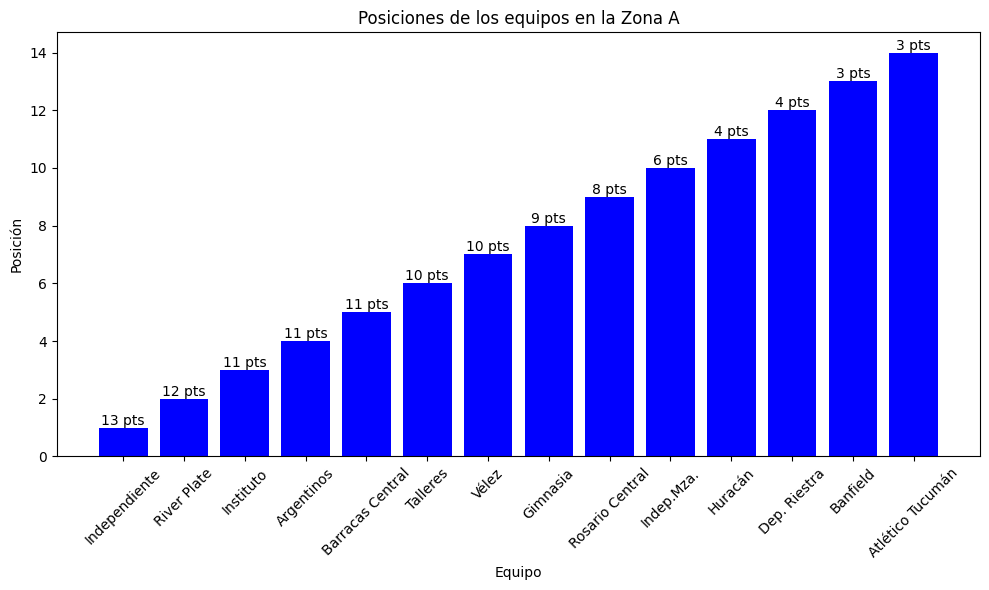

In [182]:

posiciones = equipos_zona_a['Posición']
equipos = equipos_zona_a['Equipo']
puntos = equipos_zona_a['Puntos']

plt.figure(figsize=(10, 6))
bars = plt.bar(equipos, posiciones, color='blue')
for bar, punto in zip(bars, puntos):
      plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(punto) + ' pts', ha='center', va='bottom')
plt.title('Posiciones de los equipos en la Zona A')
plt.xlabel('Equipo')
plt.ylabel('Posición')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()



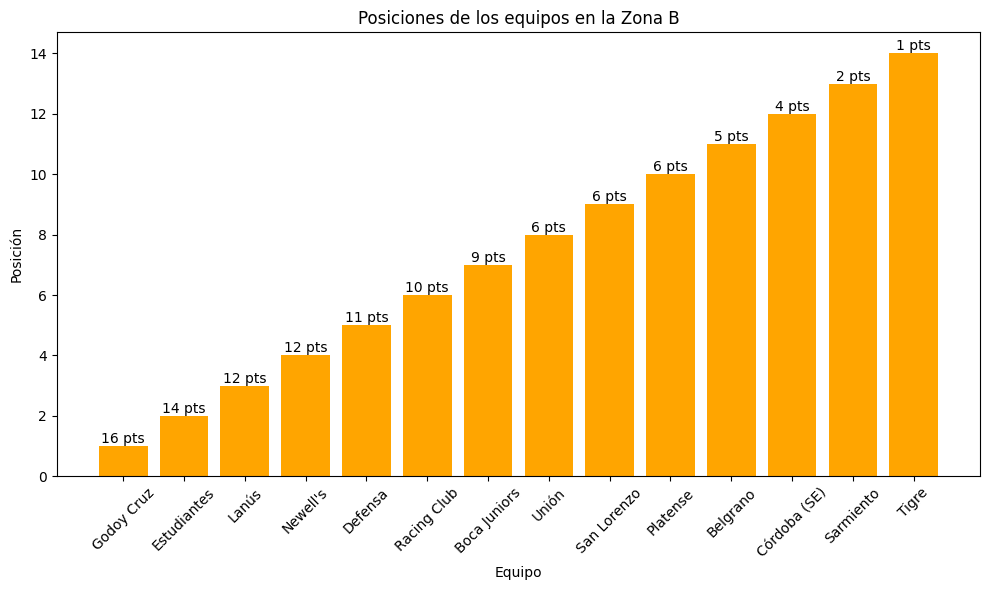

In [150]:

posiciones = equipos_zona_b['Posición']
equipos = equipos_zona_b['Equipo']
puntos = equipos_zona_b['Puntos']

plt.figure(figsize=(10, 6))
bars = plt.bar(equipos, posiciones, color='orange')
for bar, punto in zip(bars, puntos):
      plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(punto) + ' pts', ha='center', va='bottom')
plt.title('Posiciones de los equipos en la Zona B')
plt.xlabel('Equipo')
plt.ylabel('Posición')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


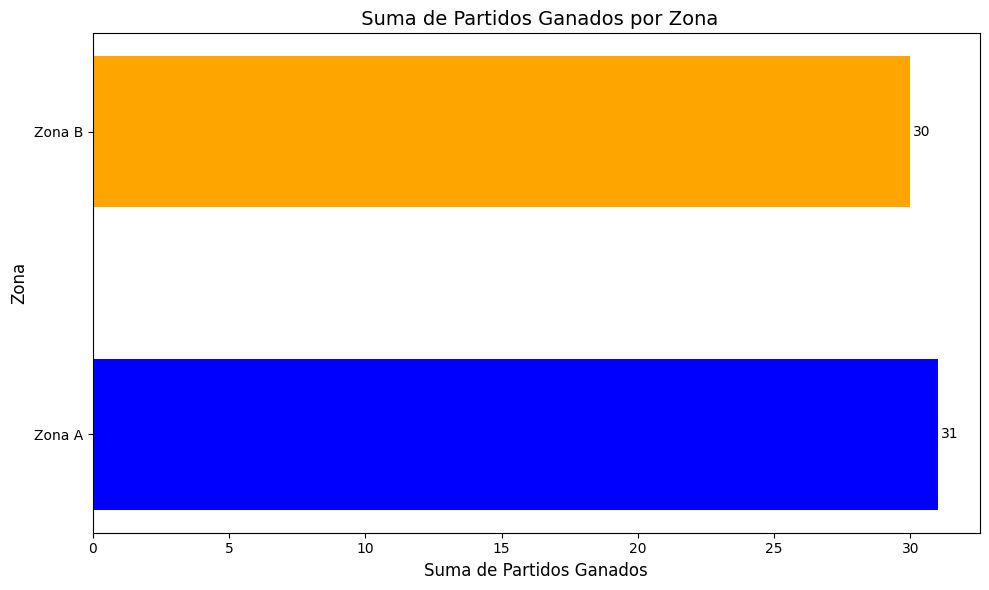

In [151]:
import matplotlib.pyplot as plt

suma_PG_zona_a = equipos_zona_a['PG'].sum()
suma_PG_zona_b = equipos_zona_b['PG'].sum()

zonas = ['Zona A', 'Zona B']
suma_PG = [suma_PG_zona_a, suma_PG_zona_b]

plt.figure(figsize=(10, 6))
plt.barh(zonas, suma_PG, color=['blue', 'orange'], height=0.5)


for i, v in enumerate(suma_PG):
    plt.text(v + 0.1, i, str(v), ha='left', va='center', fontsize=10)


plt.title(' Suma de Partidos Ganados por Zona', fontsize=14)
plt.xlabel('Suma de Partidos Ganados', fontsize=12)
plt.ylabel('Zona', fontsize=12)


plt.tight_layout()
plt.show()





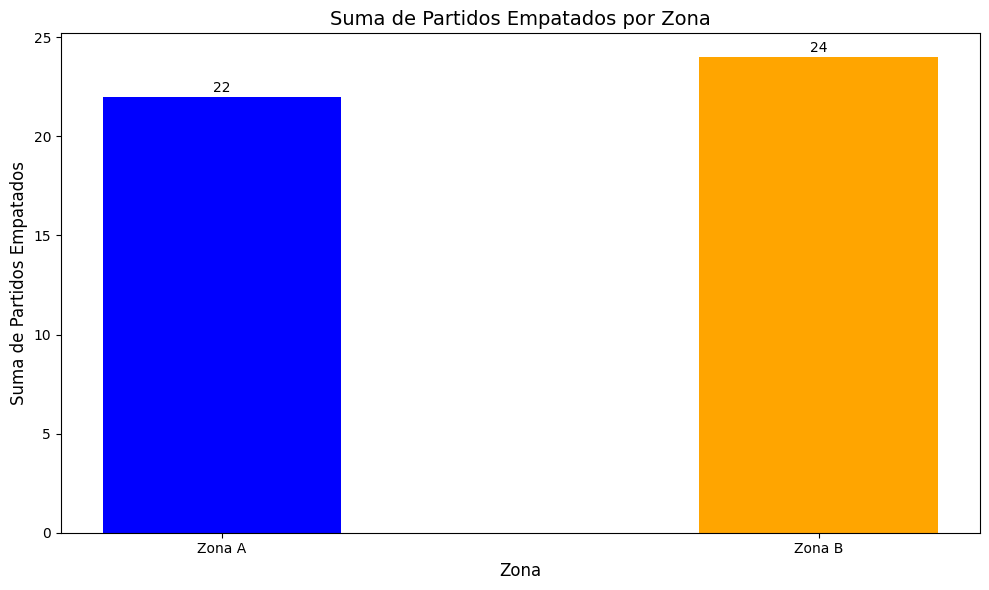

In [171]:
import matplotlib.pyplot as plt

suma_PE_zona_a = equipos_zona_a['PE'].sum()
suma_PE_zona_b = equipos_zona_b['PE'].sum()

zonas = ['Zona A', 'Zona B']
suma_PE = [suma_PE_zona_a, suma_PE_zona_b]

plt.figure(figsize=(10, 6))
plt.bar(zonas, suma_PE, color=['blue', 'orange'], width=0.4)  # Ajusta el ancho de las barras aquí

for i, v in enumerate(suma_PE):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Suma de Partidos Empatados por Zona', fontsize=14)
plt.xlabel('Zona', fontsize=12)
plt.ylabel('Suma de Partidos Empatados', fontsize=12)

plt.tight_layout()
plt.show()


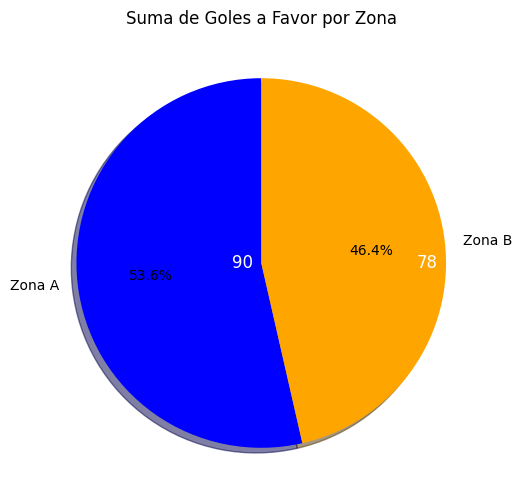

In [154]:

suma_GF_zona_a = equipos_zona_a['GF'].sum()
suma_GF_zona_b = equipos_zona_b['GF'].sum()


zonas = ['Zona A', 'Zona B']
suma_GF = [suma_GF_zona_a, suma_GF_zona_b]

plt.figure(figsize=(10, 6))
plt.pie(suma_GF, labels=zonas, autopct="%1.1f%%", shadow=True, startangle=90, colors=['blue', 'orange'])


for i, v in enumerate(suma_GF):
    plt.text(i - 0.1, 0, str(v), ha='center', va='center', fontsize=12, color='white')

plt.title('Suma de Goles a Favor por Zona')
plt.show()


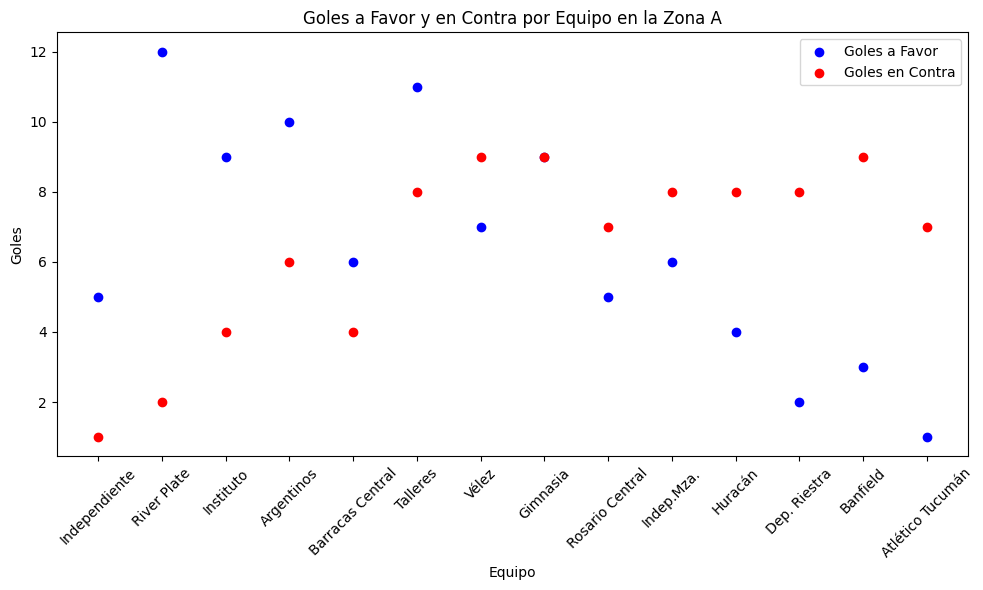

In [172]:
import matplotlib.pyplot as plt

equipos = equipos_zona_a['Equipo']
goles_a_favor = equipos_zona_a['GF']
goles_en_contra = equipos_zona_a['GC']

plt.figure(figsize=(10, 6))

plt.scatter(equipos, goles_a_favor, color='blue', label='Goles a Favor')
plt.scatter(equipos, goles_en_contra, color='red', label='Goles en Contra')

plt.title('Goles a Favor y en Contra por Equipo en la Zona A')
plt.xlabel('Equipo')
plt.ylabel('Goles')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


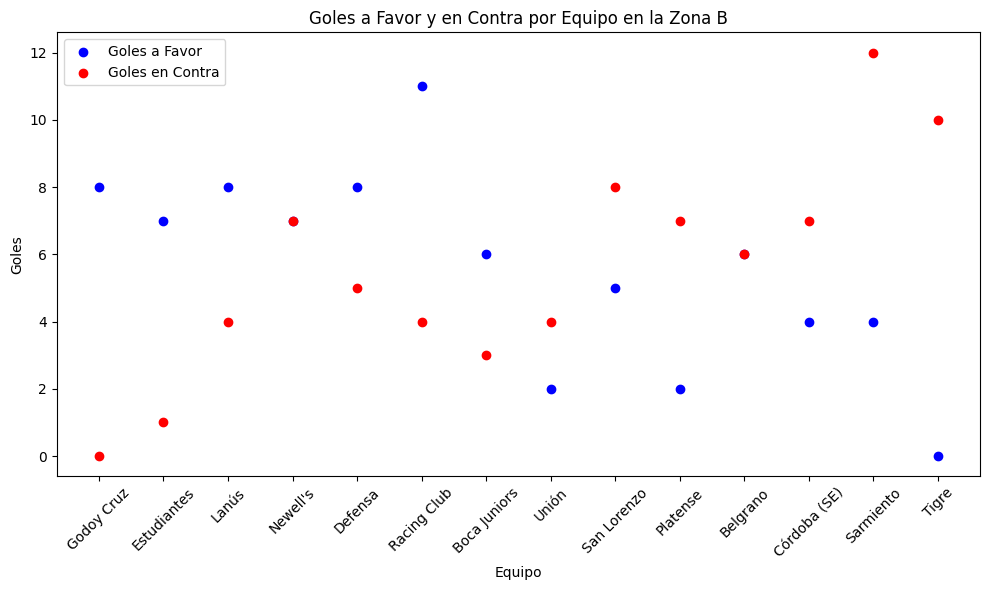

In [197]:
import matplotlib.pyplot as plt

equipos = equipos_zona_b['Equipo']
goles_a_favor = equipos_zona_b['GF']
goles_en_contra = equipos_zona_b['GC']

plt.figure(figsize=(10, 6))

plt.scatter(equipos, goles_a_favor, color='blue', label='Goles a Favor')
plt.scatter(equipos, goles_en_contra, color='red', label='Goles en Contra')

plt.title('Goles a Favor y en Contra por Equipo en la Zona B')
plt.xlabel('Equipo')
plt.ylabel('Goles')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

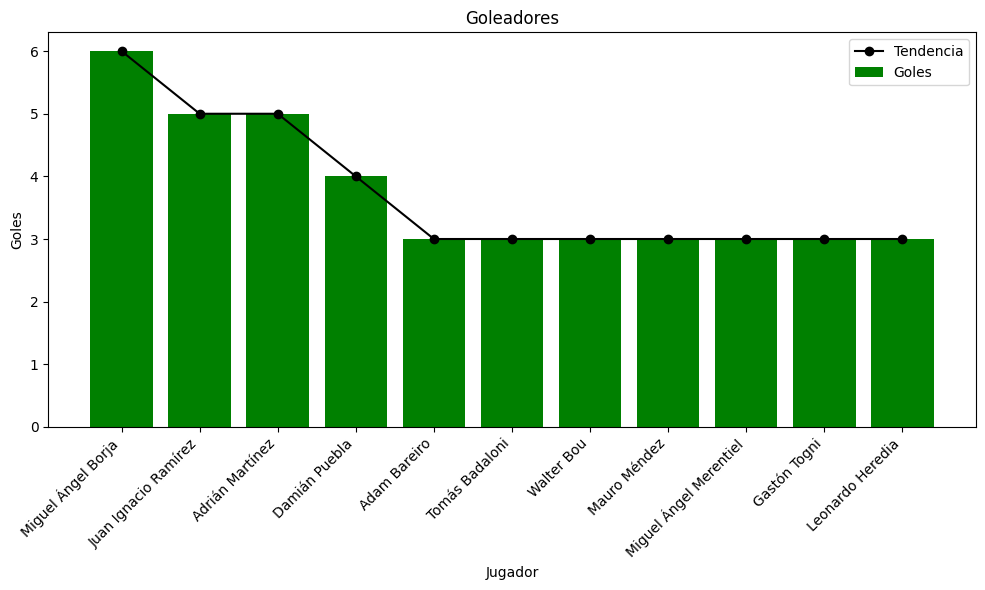

In [196]:
import matplotlib.pyplot as plt

df_goleadores_sorted = df_goleadores.sort_values(by='Goles', ascending=False)

plt.figure(figsize=(10, 6))

plt.bar(df_goleadores_sorted['Jugador'], df_goleadores_sorted['Goles'], color='green', label='Goles')

plt.plot(df_goleadores_sorted['Jugador'], df_goleadores_sorted['Goles'], marker='o', color='black', linestyle='-', label='Tendencia')

plt.title('Goleadores')
plt.xlabel('Jugador')
plt.ylabel('Goles')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
